In [2]:
# 準備
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties as fp
import matplotlib.dates as mdates

# matplotlib用ラベル日本語化設定
JP = fp(fname=r"C:\WINDOWS\Fonts\BIZ-UDGothicR.ttc", size=14)
JPFONT = {'family': 'BIZ UDGothic'}


In [18]:
# 【準備】Kaggleのタイタニック学習データを使用
df = pd.read_csv("./train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
# 「性別」を数値化
df['iSex'] = df['Sex'].map(lambda _: 1 if _ == 'male' else 0)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,iSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


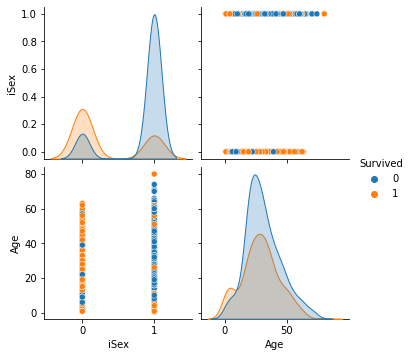

In [36]:
# 【確認】性別、年齢と生存の関係を表示
sns.pairplot(df, vars=['iSex', 'Age'], hue='Survived')
plt.show()


In [111]:
# 性別が「男性」で年齢が「NaN」でないものを抽出
df_male = pd.DataFrame(
    df.query("Sex in ['male'] and Age == Age"), columns=("Survived", "Age"))
df_male.head()


,Survived,Age
0,0,22.0
4,0,35.0
6,0,54.0
7,0,2.0
12,0,20.0


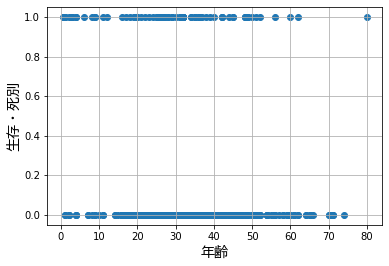

In [112]:
# 【確認】抽出したデータを散布図として表示
fig, ax = plt.subplots()
ax.scatter(df_male.Age, df_male.Survived)
ax.set_xlabel("年齢", fontproperties=JP)
ax.set_ylabel("生存・死別", fontproperties=JP)
ax.grid(True)
plt.show()


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_male[['Age']]
Y = df_male['Survived']
# 80%を学習データに、20%を検証データにする
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# ロジスティック回帰モデルのインスタンスを作成
lr = LogisticRegression()
# ロジスティック回帰モデルの重みを学習
lr.fit(X, Y)
print("係数 = ", lr.coef_)
print("切片 = ", lr.intercept_)
#print(X_test,Y_test)


係数 =  [[-0.02141494]]
切片 =  [-0.72399328]


[[0.67348576 0.32651424]
 [0.71872434 0.28127566]
 [0.75992933 0.24007067]
 [0.79680462 0.20319538]
 [0.82928819 0.17071181]
 [0.85750747 0.14249253]
 [0.88172729 0.11827271]
 [0.90229944 0.09770056]
 [0.91961951 0.08038049]
 [0.93409341 0.06590659]]


C:\Users\tamag\miniconda3\envs\j01\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


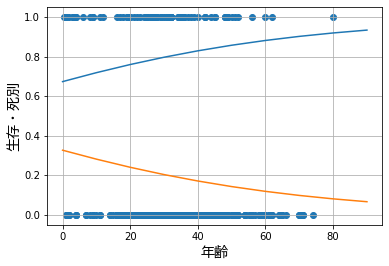

In [115]:
X_data = np.arange(0, 100, 10)
X_test = X_data.reshape(-1, 1)

Y_pred = lr.predict_proba(X_test)
print(Y_pred)

fig, ax = plt.subplots()
ax.scatter(df_male.Age, df_male.Survived)

ax.plot(X_data, Y_pred)
ax.set_xlabel("年齢", fontproperties=JP)
ax.set_ylabel("生存・死別", fontproperties=JP)
ax.grid(True)
plt.show()


In [93]:
# 性別が「女性」で年齢が「NaN」でないものを抽出
df_female = pd.DataFrame(
    df.query("Sex in ['female'] and Age == Age"), columns=("Survived", "Age"))
df_female.head()

,Survived,Age
1,1,38.0
2,1,26.0
3,1,35.0
8,1,27.0
9,1,14.0


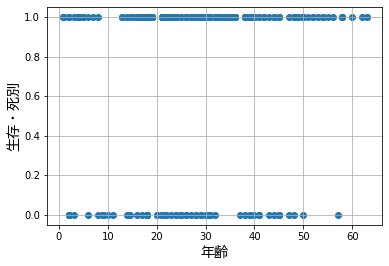

In [94]:
# 【確認】抽出したデータを散布図として表示
fig, ax = plt.subplots()
ax.scatter(df_female.Age, df_female.Survived)
ax.set_xlabel("年齢", fontproperties=JP)
ax.set_ylabel("生存・死別", fontproperties=JP)
ax.grid(True)
plt.show()

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_female[['Age']]
Y = df_female['Survived']
# 80%を学習データに、20%を検証データにする
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# ロジスティック回帰モデルのインスタンスを作成
lr = LogisticRegression()
# ロジスティック回帰モデルの重みを学習
#lr.fit(X_train, Y_train)
lr.fit(X, Y)


print("係数 coefficient = ", lr.coef_)
print("切片 intercept = ", lr.intercept_)
#print(X_test,Y_test)

係数 coefficient =  [[0.01969978]]
切片 intercept =  [0.59385797]


In [104]:
np.arange(0, 100, 10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [106]:
np.arange(0, 100, 10).reshape(-1,1)

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50],
       [60],
       [70],
       [80],
       [90]])

[[0.20710753 0.79289247]
 [0.24860762 0.75139238]
 [0.21698049 0.78301951]
 [0.24494592 0.75505408]
 [0.29532613 0.70467387]
 [0.33790213 0.66209787]
 [0.14976505 0.85023495]
 [0.29532613 0.70467387]
 [0.15744727 0.84255273]
 [0.2306666  0.7693334 ]
 [0.29124303 0.70875697]
 [0.32050409 0.67949591]
 [0.20710753 0.79289247]
 [0.27919585 0.72080415]
 [0.29532613 0.70467387]
 [0.2007122  0.7992878 ]
 [0.24494592 0.75505408]
 [0.34232343 0.65767657]
 [0.27524866 0.72475134]
 [0.27919585 0.72080415]
 [0.17376908 0.82623092]
 [0.23773249 0.76226751]
 [0.26745895 0.73254105]
 [0.33350898 0.66649102]
 [0.20710753 0.79289247]
 [0.23773249 0.76226751]
 [0.28317753 0.71682247]
 [0.28719338 0.71280662]
 [0.23418105 0.76581895]
 [0.28317753 0.71682247]
 [0.22374908 0.77625092]
 [0.25981067 0.74018933]
 [0.22034614 0.77965386]
 [0.24132083 0.75867917]
 [0.26745895 0.73254105]
 [0.29328042 0.70671958]
 [0.27133626 0.72866374]
 [0.28317753 0.71682247]
 [0.34677227 0.65322773]
 [0.22546451 0.77453549]


C:\Users\tamag\miniconda3\envs\j01\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (10,) and (261, 2)

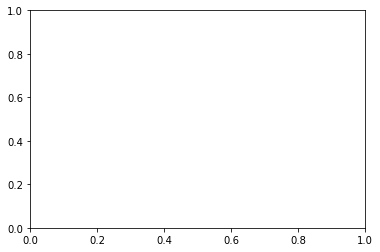

In [103]:
#Y_pred = lr.predict(df_female[["Age"]])
Y_pred = lr.predict_proba(df_female[["Age"]])
print(Y_pred)

# 予測
test_data =  np.arange(0, 100, 10)
X_test = test_data.reshape(-1,1)

#probs = lr.predict_proba(X_test)
probs = lr.predict(X_test)
print(probs)


fig, ax = plt.subplots()
ax.plot(test_data, Y_pred)
ax.set_xlabel("年齢", fontproperties=JP)
ax.set_ylabel("生存・死別", fontproperties=JP)
ax.grid(True)
plt.show()

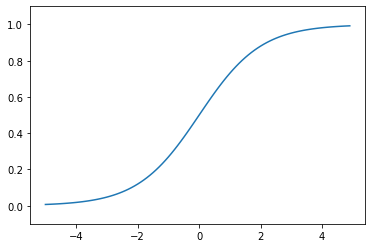

In [10]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.arange(-5.0, 5.0 , 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()